# Preprocessing 🫡

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import activations, layers, optimizers, losses

In [4]:
print(tf.__version__)

2.10.0


## Dataset

https://www.tensorflow.org/tutorials/load_data/images

In [5]:
data_dir = pathlib.Path('downloads\CatsDogs')

### Looking at the folders

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

23404


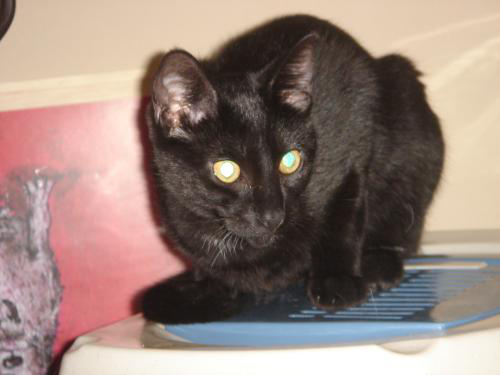

In [7]:
cats = list(data_dir.glob('Cats/*'))
PIL.Image.open(str(cats[666]))

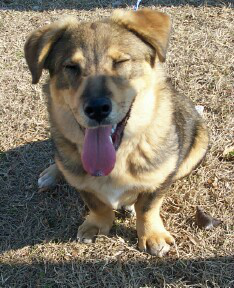

In [8]:
dogs = list(data_dir.glob('Dogs/*'))
PIL.Image.open(str(dogs[392]))

### Building the Dataset

In [38]:
batch_size = 42
img_height = 100
img_width = 100

In [39]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  color_mode='grayscale',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 23404 files belonging to 2 classes.
Using 18724 files for training.


In [40]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  color_mode='grayscale',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 23404 files belonging to 2 classes.
Using 4680 files for validation.


### Dataset visualization

In [41]:
class_names = train_ds.class_names
print(class_names)

['Cats', 'Dogs']


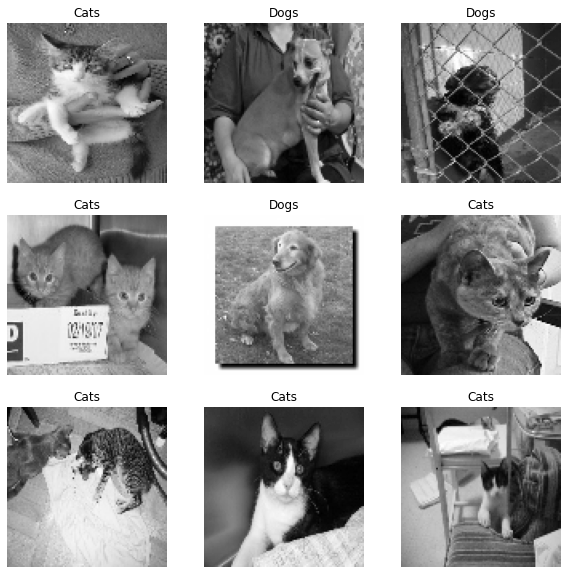

In [46]:
plt.figure(figsize=(10, 10))
#plt.gray()
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [43]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(42, 100, 100, 1)
(42,)


### Dataset standardization

In [47]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [48]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(image_batch[0]), np.max(image_batch[0]))
print(image_batch[0].shape)

0.051745098 1.0
(100, 100, 1)
